# Handwritten Digits Classification 

* Month 4 Week 1 Project

**Objective:**

Build an Artificial Neural Network (ANN) architecture for handwritten number classification, using the MNIST dataset, which contains images of handwritten digits (0-9). The objective is to create a neural network that can accurately classify these digits.


## Imports

In [1]:
!pip install tensorflow keras

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Load and Preprocess the Data

In [3]:
# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
display(y_train.shape)
display(X_train.shape)

(60000,)

(60000, 28, 28)

In [4]:
display(X_train[:6])
print('')
display(y_train)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

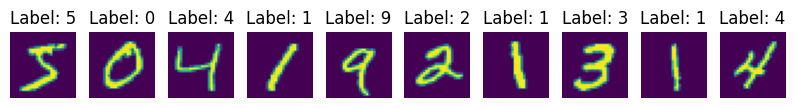

In [5]:
# Displaying the sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_train[i])   # X_train[i].reshape(28,28)-->Reshapes the flattened image back to 28x28
    plt.title(f'Label: {y_train[i]}')  # Displays the label as the title
    plt.axis('off')
#     plt.gray()
plt.show()

In [6]:
# Normalizing the images to [0, 1] range by dividing by 255
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
# Flattening the 28x28 images into vectors of size 784
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
X_train.shape

(60000, 784)

In [8]:
# The original shape of X_train is (num_images, 28, 28) i.e (60000, 28, 28), meaning there are 60,000 images, each of size 28x28.
# The total number of elements in X_train is 60000 * 28 * 28 = 47040000.

In [9]:
# Converting labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Define the ANN Architecture


In [10]:
# Initializing the model
model = Sequential()

# Input layer and first hidden layer with 128 neurons
# model.add(Input(shape=(784,)))  # Explicitly specify input shape
model.add(Dense(128, input_dim=(784), activation='relu'))

# Second hidden layer with 64 neurons
model.add(Dense(64, activation='relu'))

# Output layer with 10 neurons (one for each digit) and softmax activation
model.add(Dense(10, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model


In [13]:
# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),verbose= 1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8781 - loss: 0.4184 - val_accuracy: 0.9625 - val_loss: 0.1261
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9676 - loss: 0.1049 - val_accuracy: 0.9713 - val_loss: 0.0943
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9788 - loss: 0.0661 - val_accuracy: 0.9730 - val_loss: 0.0859
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9845 - loss: 0.0492 - val_accuracy: 0.9743 - val_loss: 0.0849
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9888 - loss: 0.0356 - val_accuracy: 0.9733 - val_loss: 0.0892
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0316 - val_accuracy: 0.9719 - val_loss: 0.1010
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0243 - val_accuracy: 0.9780 - val_loss: 0.0905
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9922 - loss: 0.0237 - 

## Evaluate the Model


In [14]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9784 - loss: 0.0932
Test accuracy: 0.9810


In [15]:
# Train vs Test Accuracy:

# Getting the last epoch's training accuracy and test accuracy
train_accuracy = round(history.history['accuracy'][-1] * 100, 2)
test_accuracy = round(history.history['val_accuracy'][-1] * 100, 2)
# Results
print(f"Training accuracy: {train_accuracy}%, Testing accuracy: {test_accuracy}%")

Training accuracy: 99.43%, Testing accuracy: 98.1%


## Save the Model


In [16]:
model.save('mnist_ann_model.h5')

## Prediction


In [17]:
# Prediction
predicted = model.predict(np.expand_dims(X_test[0], axis=0))
print(f'Predicted digit: {np.argmax(predicted)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted digit: 7
